# CLUSTERING ACTIVITY OF HOTEL BOOKINGS

Kaggle Dataset: https://www.kaggle.com/bhavishs28/hotel-booking-demand/data?select=hotel_bookings.csv

Given dataset was taken from Kaggle. There was no problem statement/ deliverables given along the dataset. Data dictionary was missing too.

Clustering activity was undertaken on given assignment using K Means algorithm to identify the segments in following chronology:

- Researcher assumed that 2 hotels belonging to the same company (1 resort and 1 city hotel)
    - Based on above, first we identified various segment of customers for the company itself.
    - 3 distinct segments were identified and segments were found to be very stable
    - Third segment was found to be relatively unstable since silhouette score was slightly less then the average silhouette score.
   
   
- Researcher then segregated data in 2 distinct datasets - One each for resort and city hotel
    - Based on above, first we identified various segment of customers for city hotel and resort hotel seperately
    - 3 distinct segments were identified and segments were found to be very stable for city hotels. Thir size of third segment was found to be extremely small in relative terms.
    - However, for resort hotels, the algorithms suggested 2 to be the best possible segments. However, these segments too were found to be skewed and relatively unstable. 

# Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from math import isnan

In [71]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [74]:
from random import sample
from numpy.random import uniform

In [75]:
from yellowbrick.cluster import silhouette_visualizer

# Loading Data

In [6]:
data= pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,nan,nan,0,Transient,0.000000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,nan,nan,0,Transient,0.000000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,nan,nan,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,nan,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,nan,0,Transient,98.000000,0,1,Check-Out,2015-07-03


# Quick Overall Check

In [7]:
data.shape

(119390, 32)

In [8]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
for i in data.select_dtypes(include= 'object').columns:
    print('*'*120)
    print(i)
    print()
    print(data[i].value_counts())
    print()

************************************************************************************************************************
hotel

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

************************************************************************************************************************
arrival_date_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

************************************************************************************************************************
meal

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

************************************************************************************************************************
country

PRT    48590
G

# Missing Data Handling

In [11]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# Percentage of missing data

(data.isna().sum()[data.isna().sum()>1]/len(data))*100


children    0.003350
country     0.408744
agent      13.686238
company    94.306893
dtype: float64

In [13]:
# Missing data in children column is extremely low (0.003%). Imputing with mode value
data['children']= data['children'].fillna(data['children'].mode()[0])

# Missing data in children column is extremely low (0.41%). Imputing with mode value
data['country']= data['country'].fillna(data['country'].mode()[0])

# Missing values in agent and company columns are considerably high. 
# Any imputation to these missing values will lead to considerable change in overall structure of predictors
# Both these columns relate to source of the booking and hence its nature is the same.
# Based on this, we will drop these columns.

data.drop(labels= ['agent', 'company'], axis= 1, inplace= True)

# Rechcking Missing values

sum(data.isna().sum())

0

# Data Preperation

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
# Converting reservation status date to proper datetime format
data['reservation_status_date']= pd.to_datetime(data['reservation_status_date'])

# Incorporating revenue column:
data['revenue']= data['adr']*(data['stays_in_week_nights'] + data['stays_in_weekend_nights'])

# Column arrival_date_week_number is not needed
data.drop(labels= 'arrival_date_week_number', axis= 1, inplace= True)

# Changing data type of column children
data['children']= data['children'].astype('int64')

# Clustering/ Segmentation - Overall Data

In [16]:
# Creating a deep copy of original dataset for this problem
cluster_data= data.copy(deep= True)

In [17]:
cluster_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue
0,Resort Hotel,0,342,2015,July,1,0,0,2,0,...,3,No Deposit,0,Transient,0.000000,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,1,0,0,2,0,...,4,No Deposit,0,Transient,0.000000,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,1,0,1,1,0,...,0,No Deposit,0,Transient,75.000000,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,1,0,1,1,0,...,0,No Deposit,0,Transient,75.000000,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,1,0,2,2,0,...,0,No Deposit,0,Transient,98.000000,0,1,Check-Out,2015-07-03,196.000000


In [18]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   stays_in_weekend_nights         119390 non-null  int64         
 7   stays_in_week_nights            119390 non-null  int64         
 8   adults                          119390 non-null  int64         
 9   children                        119390 non-null  int64         
 10  babies                          119390 non-null  int64  

In [19]:
ref_look= pd.DataFrame()
feature= []
f_type= []
f_sample= []
f_unique= []
for i in cluster_data.columns:
    feature.append(i)
    f_type.append(cluster_data[i].dtype)
    f_sample.append(cluster_data[i][0])
    f_unique.append(cluster_data[i].nunique())
    
ref_look['feature']= feature
ref_look['f_type']= f_type
ref_look['f_sample']= f_sample
ref_look['f_unique']= f_unique

ref_look

,feature,f_type,f_sample,f_unique
0,hotel,object,Resort Hotel,2
1,is_canceled,int64,0,2
2,lead_time,int64,342,479
3,arrival_date_year,int64,2015,3
4,arrival_date_month,object,July,12
5,arrival_date_day_of_month,int64,1,31
6,stays_in_weekend_nights,int64,0,17
7,stays_in_week_nights,int64,0,35
8,adults,int64,2,14
9,children,int64,0,5


In [20]:
# Incorporating checkin and checkout date
cluster_data['checkin_date']= pd.to_datetime(cluster_data['arrival_date_day_of_month'].astype('str') + " " + cluster_data['arrival_date_month'] + " " + cluster_data['arrival_date_year'].astype('str'))

# Creating recency column
cluster_data['recency']= cluster_data['reservation_status_date'].max() - cluster_data['reservation_status_date']
cluster_data['recency']= cluster_data['recency'].dt.days.astype('int64')

# Creating LengthOfStay column
cluster_data['StayLength']= cluster_data['stays_in_week_nights'] + cluster_data['stays_in_weekend_nights']

# Creating family size column
cluster_data['Family_size']= cluster_data['adults'] + cluster_data['children'] + cluster_data['babies']



In [21]:
clustering_data= cluster_data[['recency', 'StayLength', 'Family_size', 'adr', 'is_repeated_guest']]

In [22]:
scaler= MinMaxScaler()
clustering_data[[i for i in clustering_data.columns]]= scaler.fit_transform(clustering_data[[i for i in clustering_data.columns]])

In [23]:
clustering_data.head()

,recency,StayLength,Family_size,adr,is_repeated_guest
0,0.758231,0.000000,0.036364,0.001180,0.000000
1,0.758231,0.000000,0.036364,0.001180,0.000000
2,0.757291,0.014493,0.018182,0.015053,0.000000
3,0.757291,0.014493,0.018182,0.015053,0.000000
4,0.756350,0.028986,0.036364,0.019307,0.000000


## Model Building using k means

In [24]:
# Initialize with random k value:

kmeans= KMeans(n_clusters= 5, random_state= 100)
kmeans.fit(clustering_data)

KMeans(n_clusters=5, random_state=100)

In [25]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2])

In [26]:
ssd= []
range_n_clusters= [i for i in range(1,11)]

for numbers in range_n_clusters:
    kmeans= KMeans(n_clusters= numbers, random_state= 100)
    kmeans.fit(clustering_data)
    ssd.append(kmeans.inertia_)


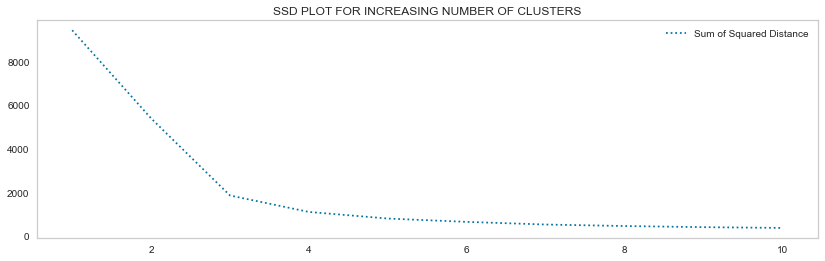

In [27]:
plt.figure(figsize= (14, 4))
plt.title('ssd plot for increasing number of clusters'.upper())
plt.plot(range_n_clusters, ssd, linestyle= ':', label= 'Sum of Squared Distance')
plt.legend()
plt.grid()
plt.show()

- Visually, it looks like 3 to be the most ideal value of k since it shows a stark decrease in curve steepness 

## Rechecking the model with Silhouette Score

In [28]:
%%time
range_n_clusters= [i for i in range(2,11)]
sil_score= []

for numbers in range_n_clusters:
    kmeans= KMeans(n_clusters= numbers, max_iter= 50, random_state= 100)
    kmeans.fit(clustering_data)
    sil_score.append(silhouette_score(clustering_data, kmeans.labels_))

sil_df= pd.DataFrame()
sil_df['clusters']= range_n_clusters
sil_df['sil_score']= sil_score
sil_df

Wall time: 57min 44s


,clusters,sil_score
0,2,0.521075
1,3,0.587000
2,4,0.521047
3,5,0.492924
4,6,0.489754
5,7,0.447640
6,8,0.407893
7,9,0.393357
8,10,0.394371


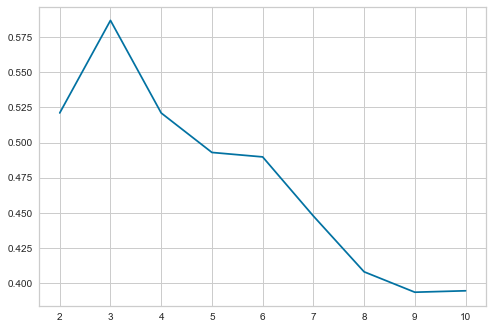

In [29]:
plt.plot(sil_df['clusters'], sil_df['sil_score'])
plt.show()

- Silhouette score also suggests k = 3 is optimum value

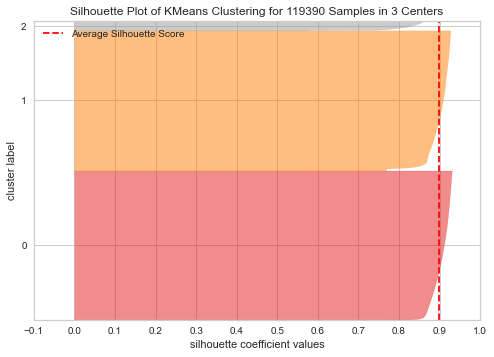

In [68]:
silhouette_visualizer(KMeans(n_clusters= 3, random_state= 100), X= clustering_data)
plt.show()

## Developing final model with k=3

In [31]:
kmeans= KMeans(n_clusters= 3, random_state= 100)
kmeans.fit(clustering_data)

KMeans(n_clusters=3, random_state=100)

In [32]:
clustering_data['cluster_lbl']= kmeans.labels_
clustering_data.groupby(by= 'cluster_lbl').mean()

,recency,StayLength,Family_size,adr,is_repeated_guest
cluster_lbl,,,,,
0,0.576354,0.048792,0.035299,0.018142,0.000000
1,0.374728,0.027913,0.025894,0.013100,1.000000
2,0.209305,0.051904,0.036875,0.022215,0.000000


<AxesSubplot:xlabel='cluster_lbl'>

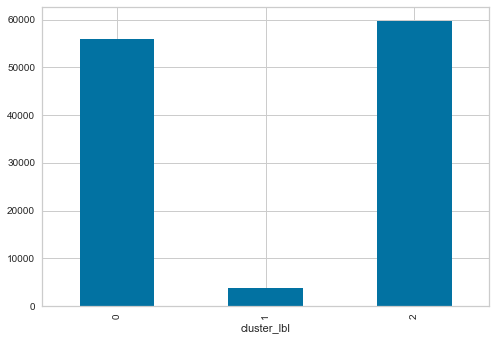

In [69]:
clustering_data.groupby(by= 'cluster_lbl').count().iloc[:,0].plot.bar()

In [33]:
clustering_data.groupby(by= 'cluster_lbl').mean()['recency']

cluster_lbl
0   0.576354
1   0.374728
2   0.209305
Name: recency, dtype: float64

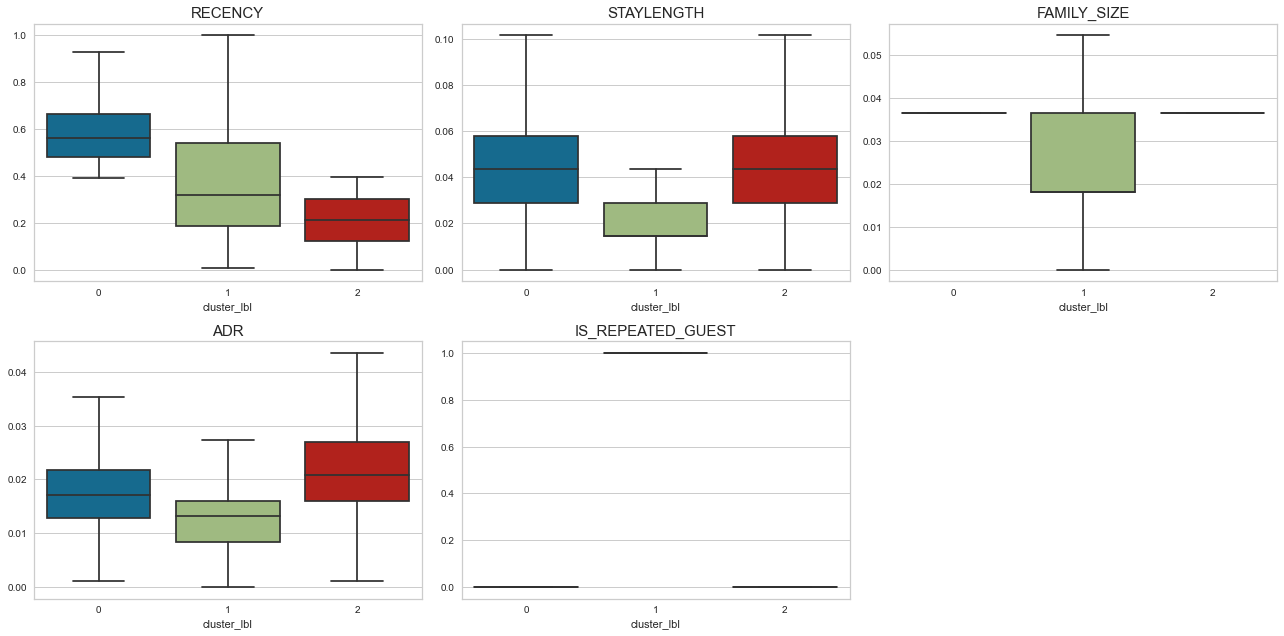

In [34]:
fig, ax= plt.subplots(nrows= 2, ncols= 3, figsize= (18, 9))
fig.delaxes(ax[-1, -1])
plt_list= [i for i in clustering_data if i != 'cluster_lbl']
k = 0
for i in range(4):
    for j in range(3):
        if k < len(plt_list):
            sns.boxplot(x= clustering_data['cluster_lbl'], y = clustering_data[plt_list[k]], 
                        ax= ax[i, j], showfliers= False)
            ax[i, j].set_title(plt_list[k].upper(), fontsize= 15)
            ax[i, j].set_ylabel('')
        k+=1
plt.tight_layout()
plt.show()

### Notable Characteristics of Segments

<b>Segment 0:</b>
- The least recent stayed customers/ guests
- Average length of stay is high
- Average family size is relatively more
- ADR is in the mid range
- They are not repeat guests

<b>Segment 1:</b>
- The most recent stayed customers/ guests
- Average length of stay is high (Same as segment 0)
- Average family size is relatively more (Same as segment 0)
- ADR is in highest from this segment
- They are not repeat guests

<b>Segment 2:</b>
- Their recency is between segment 0 and segment 1
- Average length of stay is lowest
- Their family size is relatively smaller
- They generate least ADR's
- They are often repeat guests


# Clustering/ Segmentation - Hotel Type Wise

In [35]:
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [36]:
city_data= data[data['hotel']== 'City Hotel']
resort_data= data[data['hotel']== 'Resort Hotel']

In [37]:
# Incorporating checkin and checkout date
city_data['checkin_date']= pd.to_datetime(city_data['arrival_date_day_of_month'].astype('str') + " " + city_data['arrival_date_month'] + " " + city_data['arrival_date_year'].astype('str'))
resort_data['checkin_date']= pd.to_datetime(resort_data['arrival_date_day_of_month'].astype('str') + " " + resort_data['arrival_date_month'] + " " + resort_data['arrival_date_year'].astype('str'))

# Creating recency column
city_data['recency']= city_data['reservation_status_date'].max() - city_data['reservation_status_date']
city_data['recency']= city_data['recency'].dt.days.astype('int64')

resort_data['recency']= resort_data['reservation_status_date'].max() - resort_data['reservation_status_date']
resort_data['recency']= resort_data['recency'].dt.days.astype('int64')

# Creating LengthOfStay column
city_data['StayLength']= city_data['stays_in_week_nights'] + city_data['stays_in_weekend_nights']
resort_data['StayLength']= resort_data['stays_in_week_nights'] + resort_data['stays_in_weekend_nights']

# Creating family size column
city_data['Family_size']= city_data['adults'] + city_data['children'] + city_data['babies']
resort_data['Family_size']= resort_data['adults'] + resort_data['children'] + resort_data['babies']

In [38]:
city_cluster_data= city_data[['recency', 'StayLength', 'Family_size', 'adr', 'is_repeated_guest', 
                              'stays_in_weekend_nights', 'stays_in_week_nights']]

resort_cluster_data= resort_data[['recency', 'StayLength', 'Family_size', 'adr', 'is_repeated_guest', 
                              'stays_in_weekend_nights', 'stays_in_week_nights']]


In [39]:
scaler= MinMaxScaler()

city_cluster_data[[i for i in city_cluster_data.columns]]= scaler.fit_transform(city_cluster_data[[i for i in city_cluster_data.columns]])

resort_cluster_data[[i for i in resort_cluster_data.columns]]= scaler.fit_transform(resort_cluster_data[[i for i in resort_cluster_data.columns]])


## Model Building using k means - City Hotel

In [40]:
# Initialize with random k value:

kmeans_city= KMeans(n_clusters= 5, random_state= 100)
kmeans_city.fit(city_cluster_data)

KMeans(n_clusters=5, random_state=100)

In [41]:
ssd_city= []
range_n_clusters= [i for i in range(1,11)]

for numbers in range_n_clusters:
    kmeans= KMeans(n_clusters= numbers, random_state= 100)
    kmeans.fit(city_cluster_data)
    ssd_city.append(kmeans.inertia_)

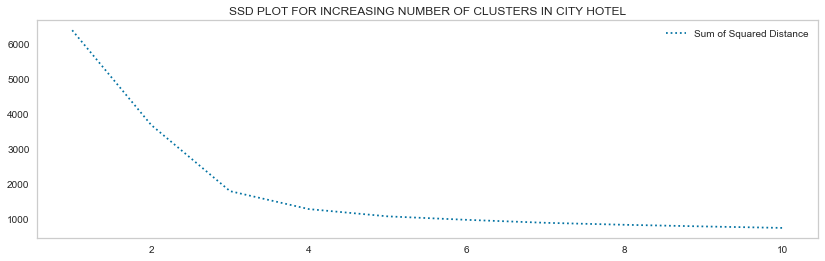

In [42]:
plt.figure(figsize= (14, 4))
plt.title('ssd plot for increasing number of clusters in city hotel'.upper())
plt.plot(range_n_clusters, ssd_city, linestyle= ':', label= 'Sum of Squared Distance')
plt.legend()
plt.grid()
plt.show()

- Visually, their seems to exist 4 segments/ clusters since it shows a stark decrease in curve steepness beyond k= 3

## Model Building using k means - Resort Hotel

In [43]:
# Initialize with random k value:

kmeans_resort= KMeans(n_clusters= 5, random_state= 100)
kmeans_resort.fit(resort_cluster_data)

KMeans(n_clusters=5, random_state=100)

In [44]:
ssd_resort= []
range_n_clusters= [i for i in range(1,11)]

for numbers in range_n_clusters:
    kmeans= KMeans(n_clusters= numbers, random_state= 100)
    kmeans.fit(resort_cluster_data)
    ssd_resort.append(kmeans.inertia_)

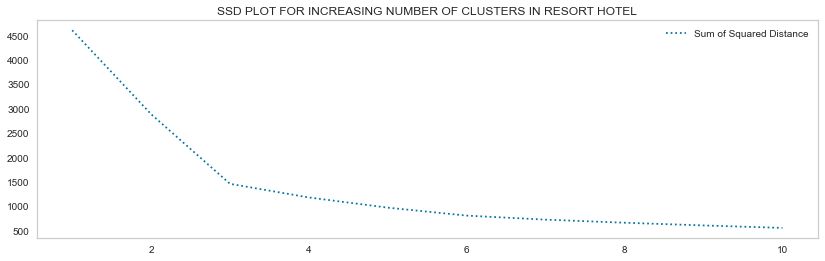

In [45]:
plt.figure(figsize= (14, 4))
plt.title('ssd plot for increasing number of clusters in resort hotel'.upper())
plt.plot(range_n_clusters, ssd_resort, linestyle= ':', label= 'Sum of Squared Distance')
plt.legend()
plt.grid()
plt.show()

- Visually, their seems to exist 3 segments/ clusters since it shows a stark decrease in curve steepness beyond k= 3

## Rechecking Model Using Silhouette Score - City Hotel

In [46]:
%%time
range_n_clusters= [i for i in range(2,11)]
sil_score_city= []

for numbers in range_n_clusters:
    kmeans= KMeans(n_clusters= numbers, max_iter= 50, random_state= 100)
    kmeans.fit(city_cluster_data)
    sil_score_city.append(silhouette_score(city_cluster_data, kmeans.labels_))


Wall time: 15min 57s


In [47]:
city_sil_df= pd.DataFrame()
city_sil_df['clusters']= range_n_clusters
city_sil_df['sil_score']= sil_score_city
city_sil_df

,clusters,sil_score
0,2,0.458068
1,3,0.502458
2,4,0.401025
3,5,0.339951
4,6,0.336267
5,7,0.277815
6,8,0.274893
7,9,0.245110
8,10,0.243788


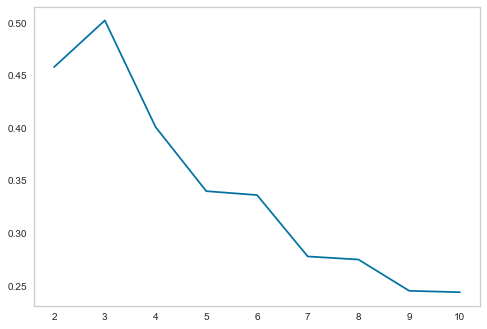

In [48]:
plt.plot(city_sil_df['clusters'], city_sil_df['sil_score'])
plt.grid()
plt.show()

- Silhouette score also suggests k = 3 is optimum value

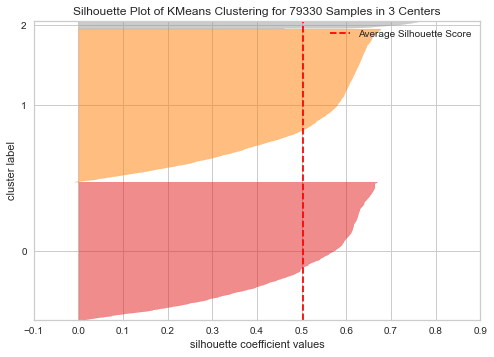

In [49]:
silhouette_visualizer(KMeans(n_clusters= 3, random_state= 100), X= city_cluster_data)
plt.show()

- Silhouette score of each cluster is above average silhouette score

## Rechecking Model Using Silhouette Score - Resort Hotel

In [50]:
%%time
range_n_clusters= [i for i in range(2,11)]
sil_score_resort= []

for numbers in range_n_clusters:
    kmeans= KMeans(n_clusters= numbers, max_iter= 50, random_state= 100)
    kmeans.fit(resort_cluster_data)
    sil_score_resort.append(silhouette_score(resort_cluster_data, kmeans.labels_))


Wall time: 4min 10s


In [51]:
resort_sil_df= pd.DataFrame()
resort_sil_df['clusters']= range_n_clusters
resort_sil_df['sil_score']= sil_score_resort
resort_sil_df

,clusters,sil_score
0,2,0.684386
1,3,0.450184
2,4,0.405310
3,5,0.341764
4,6,0.374759
5,7,0.367239
6,8,0.340259
7,9,0.332608
8,10,0.307290


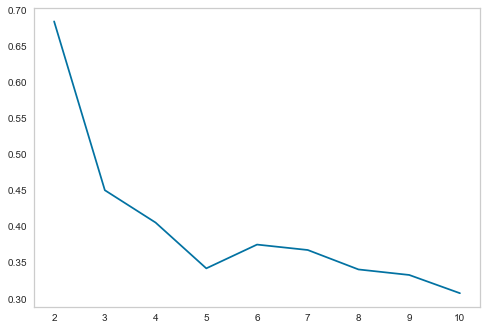

In [52]:
plt.plot(resort_sil_df['clusters'], resort_sil_df['sil_score'])
plt.grid()
plt.show()

- Silhouette score also suggests k = 2 is optimum value

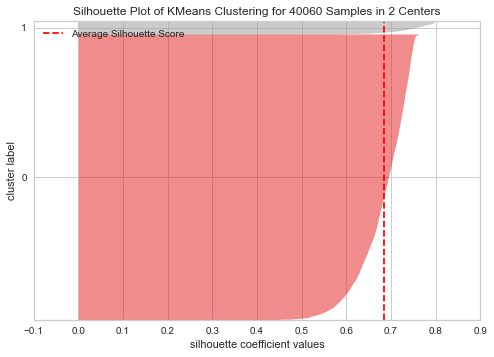

In [53]:
silhouette_visualizer(KMeans(n_clusters= 2, random_state= 100), X= resort_cluster_data)
plt.show()

- Silhouette score of each cluster is above average silhouette score

## Rebuilding seperate k means models for city and resort hotels based on silhouette score

### City Hotel

In [54]:
kmeans_city_final= KMeans(n_clusters= 3, random_state= 100)
kmeans_city_final.fit(city_cluster_data)

KMeans(n_clusters=3, random_state=100)

In [55]:
city_data['cluster labels']= kmeans_city_final.labels_

In [56]:
# Cluster Sizes:

for i in range(3):
    print('Cluster:', i, len(city_data[city_data['cluster labels']== i]))

Cluster: 0 36662
Cluster: 1 40636
Cluster: 2 2032


<AxesSubplot:xlabel='cluster labels'>

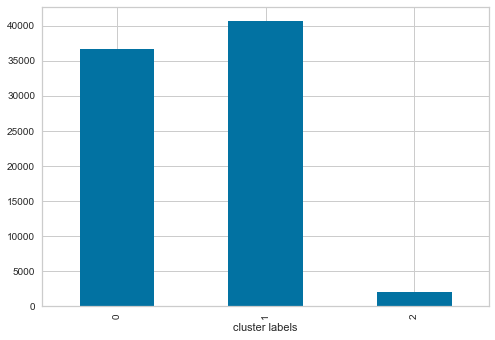

In [57]:
city_data.groupby(by= 'cluster labels').count().iloc[:,0].plot.bar()

In [58]:
city_data['arrival_date_year']= city_data['arrival_date_year'].astype('object')

In [59]:
city_data.select_dtypes(include= ['int64', 'float64'])

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,revenue,recency,StayLength,Family_size
40060,0,6,1,0,2,1,0,0,0,0,0,0,0,0.000000,0,0,0.000000,797,2,1
40061,1,88,1,0,4,2,0,0,0,0,0,0,0,76.500000,0,1,306.000000,799,4,2
40062,1,65,1,0,4,1,0,0,0,0,0,0,0,68.000000,0,1,272.000000,861,4,1
40063,1,92,1,2,4,2,0,0,0,0,0,0,0,76.500000,0,2,459.000000,807,6,2
40064,1,100,2,0,2,2,0,0,0,0,0,0,0,76.500000,0,1,153.000000,889,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,30,2,5,2,0,0,0,0,0,0,0,96.140000,0,0,672.980000,1,7,2
119386,0,102,31,2,5,3,0,0,0,0,0,0,0,225.430000,0,2,1578.010000,0,7,3
119387,0,34,31,2,5,2,0,0,0,0,0,0,0,157.710000,0,4,1103.970000,0,7,2
119388,0,109,31,2,5,2,0,0,0,0,0,0,0,104.400000,0,0,730.800000,0,7,2


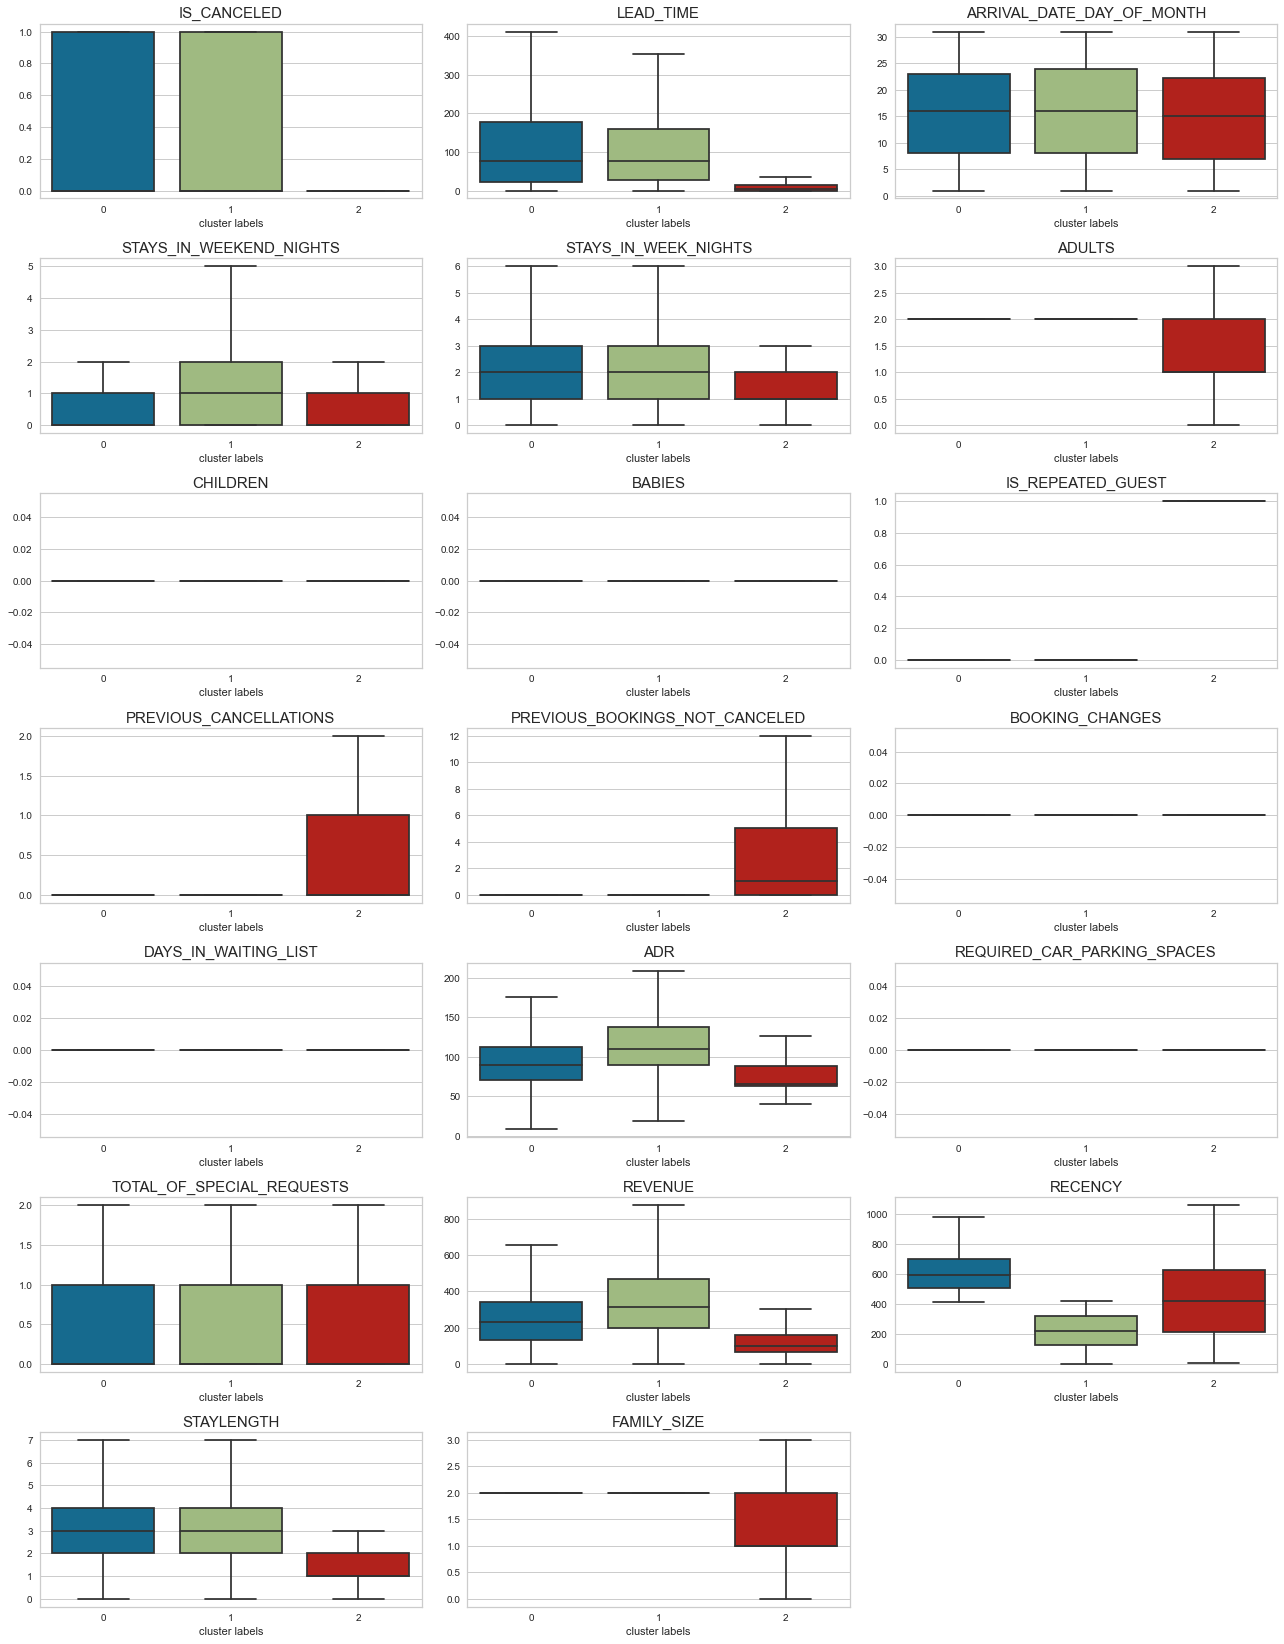

In [60]:
fig, ax= plt.subplots(nrows= 7, ncols= 3, figsize= (18, 23))
fig.delaxes(ax[-1,-1])


plt_list= [i for i in city_data.select_dtypes(include= ['int64', 'float64']).columns]

k = 0
for i in range(7):
    for j in range(3):
        if k < len(plt_list):
            sns.boxplot(x= city_data['cluster labels'], y = city_data[plt_list[k]], 
                        ax= ax[i, j], showfliers= False)
            ax[i, j].set_title(plt_list[k].upper(), fontsize= 15)
            ax[i, j].set_ylabel('')
        k+=1
plt.tight_layout()
plt.show()

<b>NOTABLE SEGMENT CHARACTERISTICS:</b>

SEGMENT 0:
- Relatively older stay at the hotel (Mean stay period is approx 600 days ago)

SEGMENT 1:
- Stay duration covers weekend more often
- Highest ADR and revenue achieved from this segment
- Most recent group of stayers (Mean stay period is approx 200 days ago)

SEGMENT 2:
- Cancellations are less likely ones this segment books the room
- Booking window for this segment is a lot shorter
- Family size is relatively larger then other segments
- ADR is found to be lowest in this segment. Likewise is the case with revenue.
- Stay length has been shortest from this segment.
- Family size variation is most seen in this segment.


### Resort Hotel

In [61]:
kmeans_resort_final= KMeans(n_clusters= 2, random_state= 100)
kmeans_resort_final.fit(resort_cluster_data)

KMeans(n_clusters=2, random_state=100)

In [62]:
resort_data['cluster labels']= kmeans_resort_final.labels_

In [63]:
# Cluster Sizes:

for i in range(2):
    print('Cluster:', i, len(resort_data[resort_data['cluster labels']== i]))

Cluster: 0 38282
Cluster: 1 1778


<AxesSubplot:xlabel='cluster labels'>

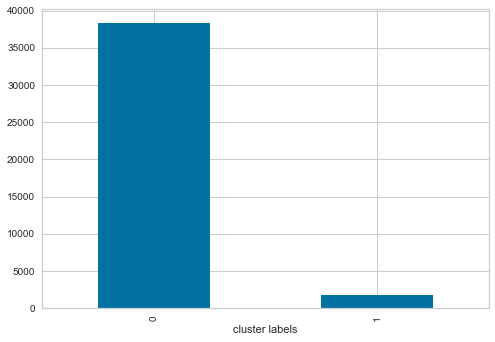

In [64]:
resort_data.groupby(by= 'cluster labels').count().iloc[:,0].plot.bar()

In [65]:
resort_data['arrival_date_year']= resort_data['arrival_date_year'].astype('object')

In [66]:
resort_data.select_dtypes(include= ['int64', 'float64'])

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,revenue,recency,StayLength,Family_size
0,0,342,1,0,0,2,0,0,0,0,0,3,0,0.000000,0,0,0.000000,806,0,2
1,0,737,1,0,0,2,0,0,0,0,0,4,0,0.000000,0,0,0.000000,806,0,2
2,0,7,1,0,1,1,0,0,0,0,0,0,0,75.000000,0,0,75.000000,805,1,1
3,0,13,1,0,1,1,0,0,0,0,0,0,0,75.000000,0,0,75.000000,805,1,1
4,0,14,1,0,2,2,0,0,0,0,0,0,0,98.000000,0,1,196.000000,804,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,31,2,8,2,1,0,0,0,0,1,0,89.750000,0,0,897.500000,4,10,3
40056,0,169,30,2,9,2,0,0,0,0,0,0,0,202.270000,0,1,2224.970000,4,11,2
40057,0,204,29,4,10,2,0,0,0,0,0,0,0,153.570000,0,3,2149.980000,2,14,2
40058,0,211,31,4,10,2,0,0,0,0,0,0,0,112.800000,0,1,1579.200000,0,14,2


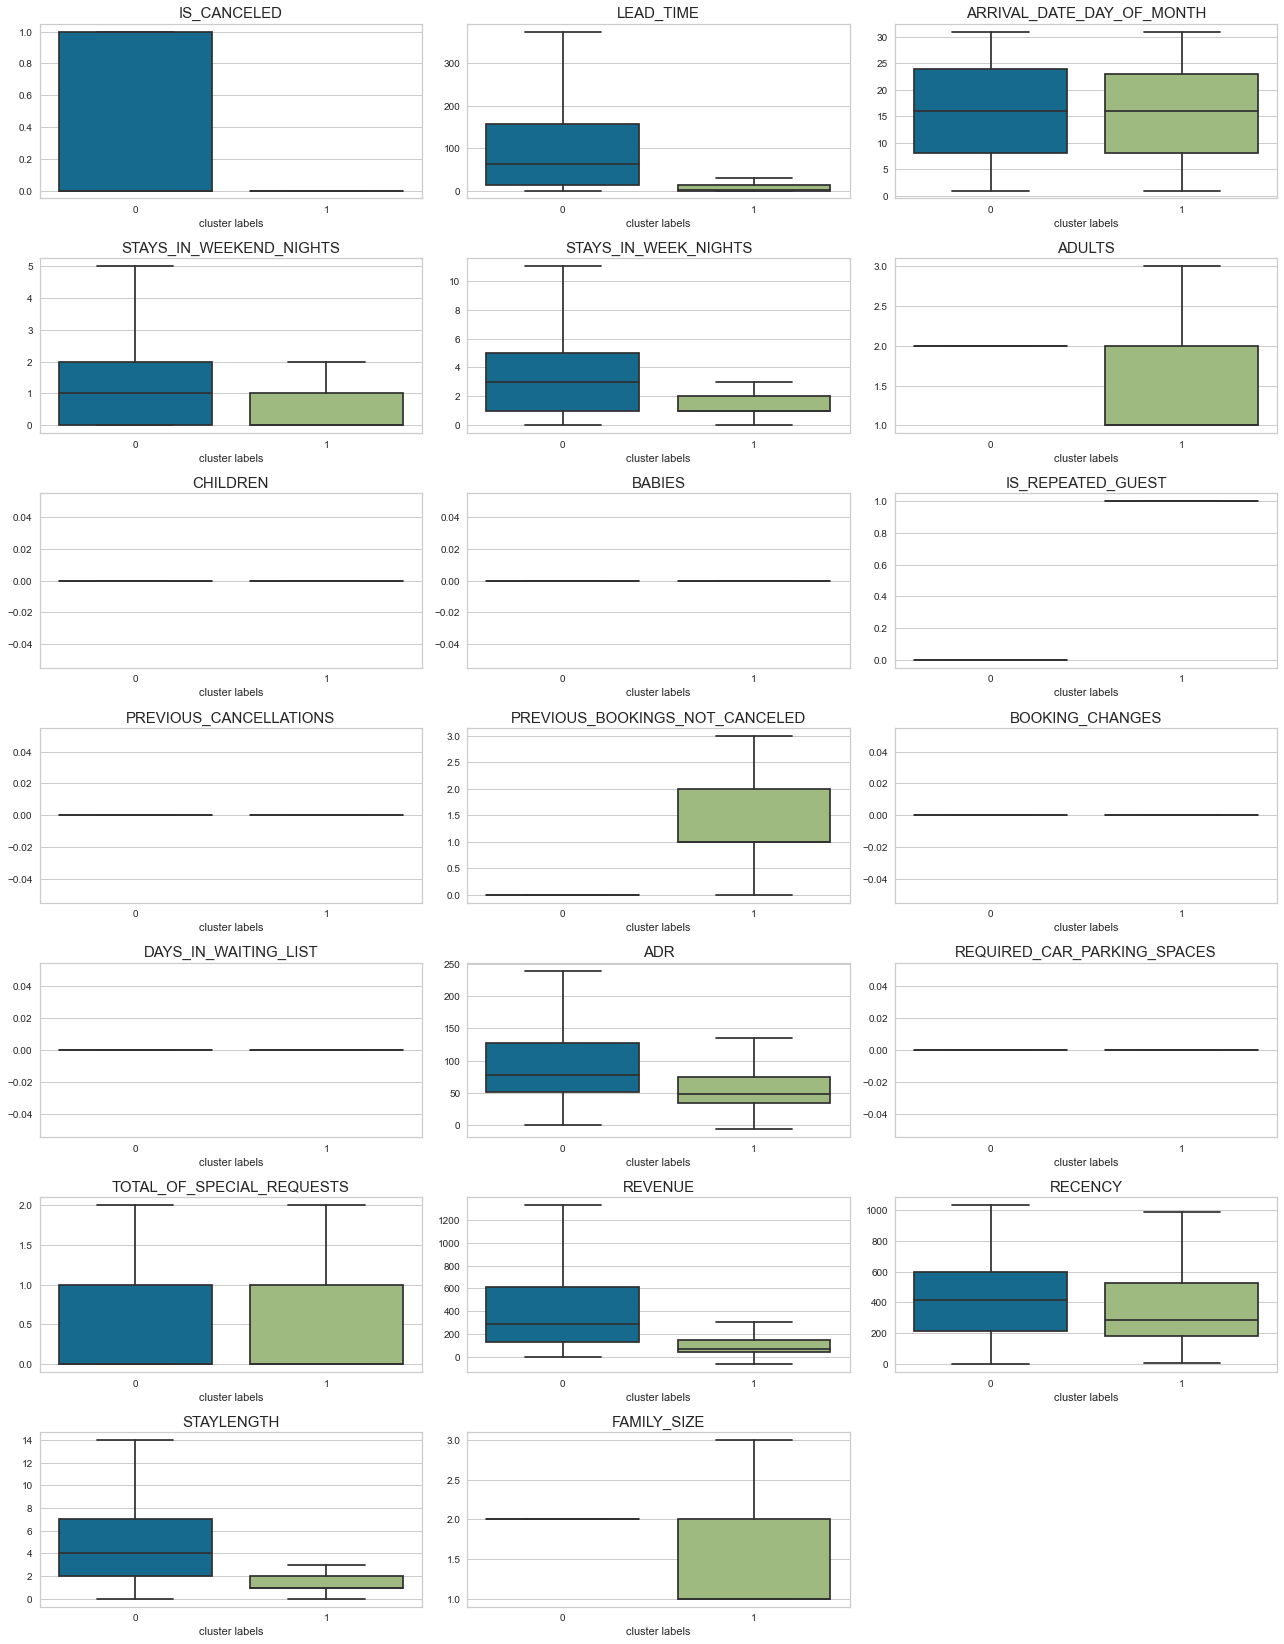

In [67]:
fig, ax= plt.subplots(nrows= 7, ncols= 3, figsize= (18, 23))
fig.delaxes(ax[-1,-1])

plt_list= [i for i in resort_data.select_dtypes(include= ['int64', 'float64']).columns]

k = 0
for i in range(7):
    for j in range(3):
        if k < len(plt_list):
            sns.boxplot(x= resort_data['cluster labels'], y = resort_data[plt_list[k]], 
                        ax= ax[i, j], showfliers= False)
            ax[i, j].set_title(plt_list[k].upper(), fontsize= 15)
            ax[i, j].set_ylabel('')
        k+=1
plt.tight_layout()
plt.show()

<b>NOTABLE SEGMENT CHARACTERISTICS:</b>

SEGMENT 1:
- Higher ADR as well as revenue observed in this segment.
- Stay in this segment has been more recent (Close to 200 days ago)